import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as skim
from skimage import io
from skimage.util import crop
import matplotlib.image as mpimg

definition function

In [2]:
def thresholding(thresh,img):
    nrow, ncol, ncolor  = img.shape
    new_img = img.copy()
    for i in range(nrow):
        for j in range(ncol):
            if(img[i,j][0]>thresh and img[i,j][1]>thresh and img[i,j][2]>thresh ):
                new_img[i,j] = [255,255,255]
    # plt.imshow(new_img)
    return new_img

In [3]:
def thresholding_2value(min_th,max_th,img):
    nrow, ncol, ncolor  = img.shape
    new_img = img.copy()
    for i in range(nrow):
        for j in range(ncol):
            if(img[i,j][0]>max_th and img[i,j][1]>max_th and img[i,j][2]>max_th ):
                new_img[i,j] = [255,255,255]
            if(img[i,j][0]<min_th and img[i,j][1]<min_th and img[i,j][2]<min_th ):
                new_img[i,j] = [255,255,255]
    # plt.imshow(new_img)
    return new_img

In [4]:
def find_length(img,position = True): #input must thresholding before
    nrow, ncol, ncolor  = img.shape
    right_position = []
    left_position = []
    #find all left side
    temp1 = []
    for i in range(nrow):
        for j in range(ncol):
            if(img[i,j][0] < 255 ):
                temp1.append((i,j))
                break
    #find true left side
    temp2 = []
    for i in range(len(temp1)):
        temp2.append(temp1[i][1])
    min_col = np.min(temp2)
    #find center true left side
    temp3 = []
    for i in range(nrow):
        if(img[i,min_col][0] < 255 ):
            temp3.append(i)
    if(len(temp3) == 1):
        min_row = temp3[0]
    elif(len(temp3)%2 == 0):
        min_row = temp3[int(len(temp3)/2)]
    else:
        min_row = temp3[int(len(temp3)/2) + 1]
    left_position = [min_row,min_col]
    # print(left_position)

    #find all right side
    temp1 = []
    for i in range(nrow):
        for j in range(ncol):
            i_inverse = (nrow-1) - i
            j_inverse = (ncol-1) - j
            if(img[i_inverse,j_inverse][0] < 255 ):
                temp1.append((i_inverse,j_inverse))
                break
    #find true right side
    temp2 = []
    for i in range(len(temp1)):
        temp2.append(temp1[i][1])
    max_col = np.max(temp2)
    #find center true right side
    temp3 = []
    for i in range(nrow):
        if(img[i,max_col][0] < 255 ):
            temp3.append(i)
    if(len(temp3) == 1):
        min_row = temp3[0]
    elif(len(temp3)%2 == 0):
        min_row = temp3[int(len(temp3)/2)]
    else:
        min_row = temp3[int(len(temp3)/2) + 1]
    right_position = [min_row,max_col]
    if(position == True):
        print(left_position)
        print(right_position)

    #find length with pythagoras theorem
    base = np.abs(right_position[1] - left_position[1])
    perp = np.abs(left_position[0] - right_position[0])
    length = np.hypot(base, perp)
    # print("length of picture is " , length , str("pixel"))
    return length
    

In [5]:
def plot_compare_img(img1,img2):
    plt.figure(figsize=(20,10))
    plt.subplot(121), plt.imshow(img1), plt.axis('off') 
    plt.subplot(122), plt.imshow(img2), plt.axis('off') 
    plt.show()  

In [6]:
def plot_histogram(img):
    _ = plt.hist(img.ravel(), bins = 256, color = 'orange', )
    _ = plt.hist(img[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
    _ = plt.hist(img[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
    _ = plt.hist(img[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
    _ = plt.xlabel('Intensity Value')
    _ = plt.ylabel('Count')
    _ = plt.legend(['Total', 'Red_Channel', 'Green_Channel', 'Blue_Channel'])
    plt.show()

In [18]:
def pixel_to_cm(pixel):
    return (pixel*0.5)/53

make measure image

In [14]:
def_img = io.imread("image\\11.13.2020 Heptane-0.02mM Triton x-100\\frame 2\\9-27-40 PM\\11.13.2020 (2) 0282.jpg", as_gray=False)
def_img.shape

(1080, 1920, 3)

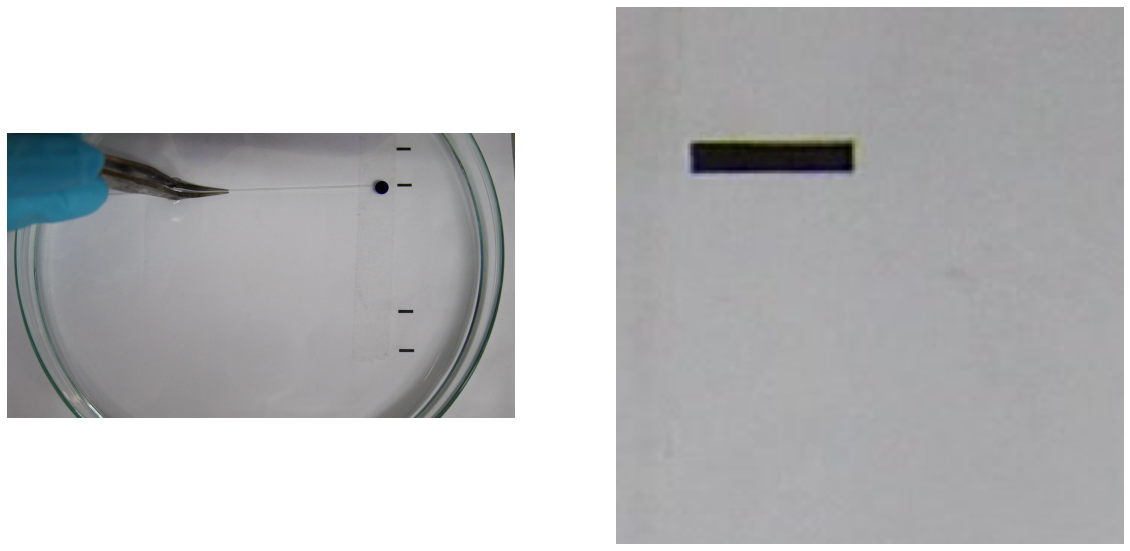

In [15]:
measure_im = crop(def_img, ((150, 750), (1450, 300), (0,0)), copy=False)
# print(def_img.shape, measure_im.shape)
plot_compare_img(def_img,measure_im)

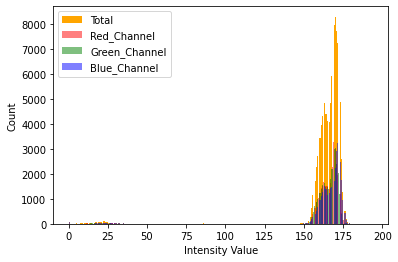

In [16]:
plot_histogram(measure_im)

[49, 25]
[51, 78]


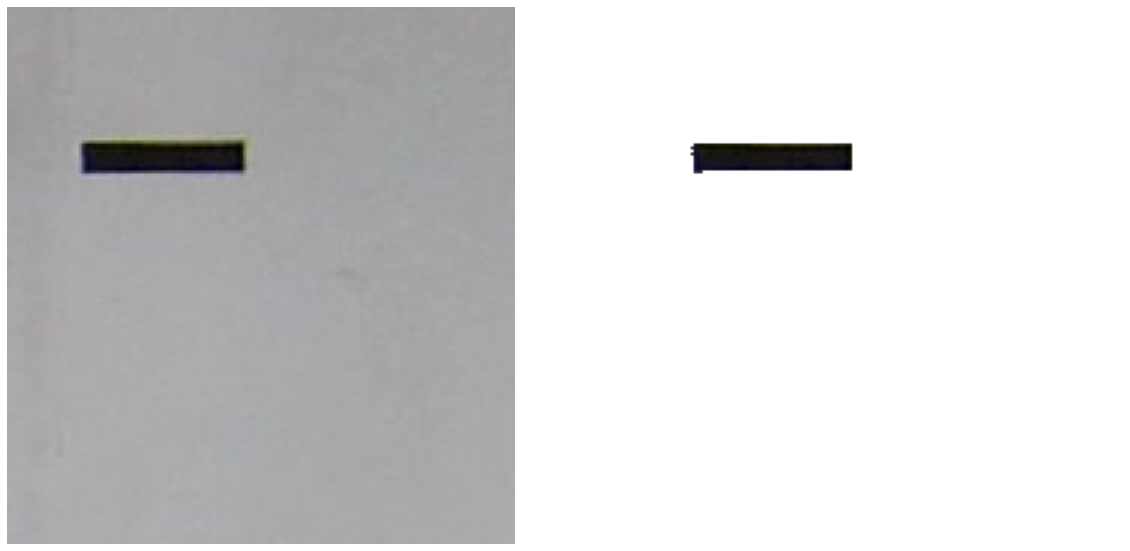

length of picture is  53.03772242470448 pixel


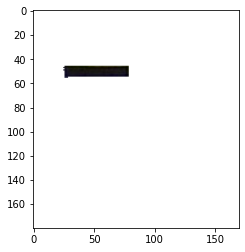

In [17]:
thresh_measure_im = thresholding(50,measure_im)
l = find_length(thresh_measure_im)
plot_compare_img(measure_im,thresh_measure_im)
plt.imshow(thresh_measure_im)
print("length of picture is " , l , str("pixel"))

53 pixel = 0.5 cm

x pixel = y cm


y cm = (x pixel* 0.5) / 53


find definition length first picture

(1080, 1920, 3) (180, 580, 3)


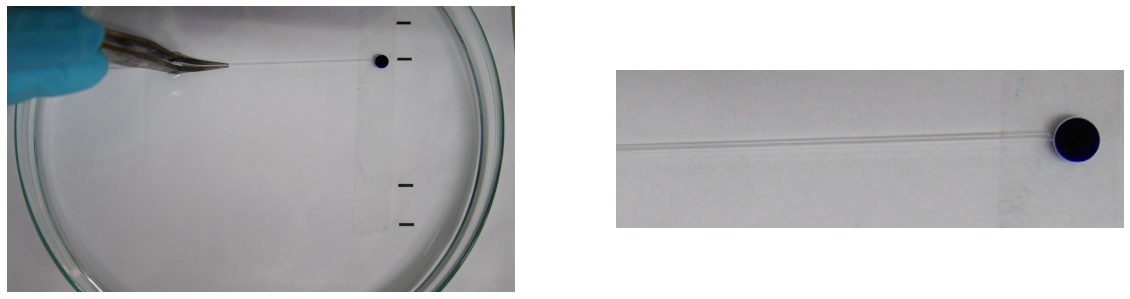

In [28]:
def_crop_im = crop(def_img, ((130, 770), (890, 450), (0,0)), copy=False)
print(def_img.shape, def_crop_im.shape)
plot_compare_img(def_img,def_crop_im)

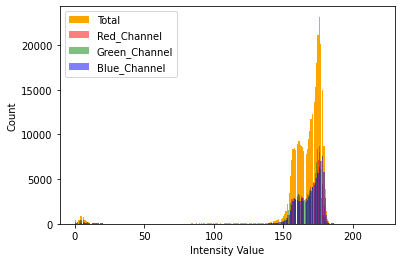

In [29]:
plot_histogram(def_crop_im)

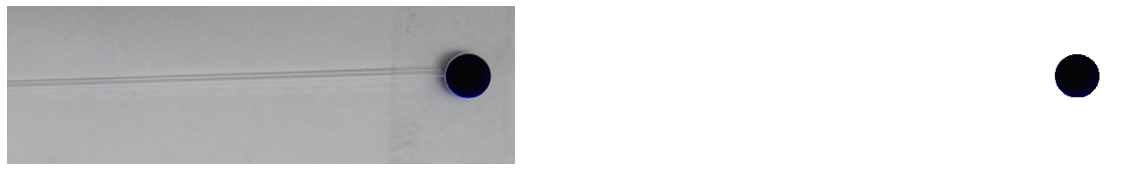

In [30]:
Tdef_img2 = thresholding(45,def_crop_im)
plot_compare_img(def_crop_im,Tdef_img2)


[80, 501]
[80, 551]
ldef  50.0 pixel


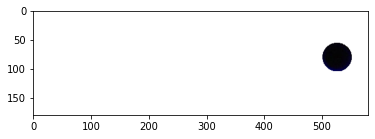

In [31]:
ldef = find_length(Tdef_img2)
plt.imshow(Tdef_img2)
print("ldef " , ldef , str("pixel"))

find length on crop value 1 from 0282 to 0395

In [34]:
number_of_picture = 282
thresh = 35
template1 = []
l_def =  50.0
for i in range(395-282+1):
    if(True) :   
        image = mpimg.imread( "image\\11.13.2020 Heptane-0.02mM Triton x-100\\frame 2\\9-27-40 PM\\11.13.2020 (2) " + str(number_of_picture + i).zfill(4) + ".jpg" )
        crop_image = crop(image, ((130, 770), (840, 450), (0,0)), copy=False)
        thresh_image = thresholding(thresh,crop_image)
        # plot_compare_img(crop_image,thresh_image)
        length = find_length(thresh_image,False)
        length = length - l_def
        length = int(length)
        template1.append(length)
        # print(i, length)
        # plt.figure()
        # plt.imshow(thresh_image)
        # for i in range(len(template1)/2):
        #     if(template1[i] > 70):


In [35]:
print(template1)
print(len(template1))

[0, -1, 0, 2, 2, 1, 2, 0, 0, 1, 2, 2, 2, 2, 2, 3, 4, 5, 5, 6, 7, 8, 10, 12, 16, 20, 26, 32, 38, 45, 51, 57, 64, 70, 77, 83, 89, 96, 102, 107, 112, 118, 124, 550, 550, 549, 549, 155, 161, 167, 174, 178, 184, 190, 196, 201, 206, 211, 217, 221, 226, 230, 235, 240, 245, 250, 255, 260, 263, 268, 273, 277, 282, 287, 291, 296, 300, 306, 311, 316, 321, 326, 332, 337, 341, 346, 351, 355, 362, 366, 373, 376, 377, 383, 389, 393, 398, 402, 405, 408, 413, 419, 426, 428, 430, 434, 438, 443, 447, 452, 456, 459, 461, 465]
114


find length on crop value 2 from 0396 to 1200

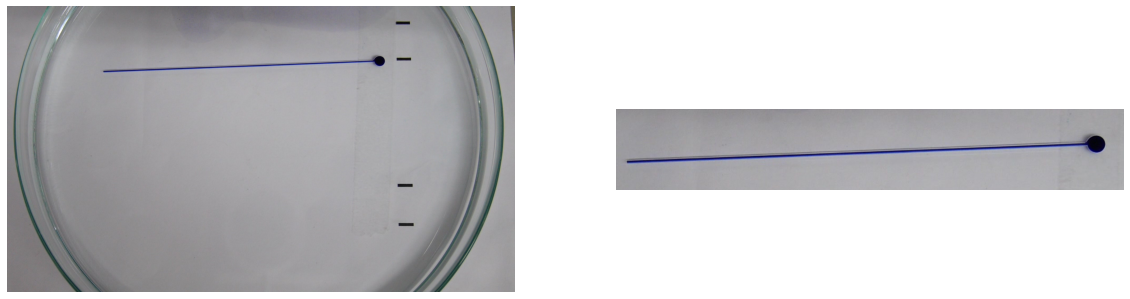

In [38]:
image = mpimg.imread( "image\\11.13.2020 Heptane-0.02mM Triton x-100\\frame 2\\9-27-40 PM\\11.13.2020 (2) " + str(1200).zfill(4) + ".jpg" )
crop_image = crop(image, ((130, 770), (340, 450), (0,0)), copy=False)
plot_compare_img(image,crop_image)

In [40]:
number_of_picture = 396
thresh = 35
template2 = []
l_def =  50.0
for i in range(1200-396+1):
    if( True) :
        image = mpimg.imread( "image\\11.13.2020 Heptane-0.02mM Triton x-100\\frame 2\\9-27-40 PM\\11.13.2020 (2) " + str(number_of_picture + i).zfill(4) + ".jpg" )
        crop_image = crop(image, ((130, 770), (340, 450), (0,0)), copy=False)
        if(True):
            thresh_image = thresholding(thresh,crop_image)
        else:
            thresh_image = thresholding(40,crop_image)
        # plot_compare_img(crop_image,thresh_image)
        # print(i)
        length = find_length(thresh_image,False)
        length = length - l_def
        length = int(length)
        template2.append(length)
        # print(i, length)
        # plt.figure()
        # plt.imshow(thresh_image)

In [41]:
print(template2)
print(len(template2))

[470, 474, 479, 482, 486, 490, 492, 497, 501, 505, 509, 513, 517, 520, 524, 528, 532, 535, 539, 543, 547, 551, 554, 558, 562, 566, 569, 573, 576, 581, 586, 587, 591, 595, 600, 604, 608, 611, 615, 619, 623, 627, 631, 636, 640, 644, 646, 649, 653, 658, 662, 667, 671, 675, 679, 683, 686, 690, 694, 698, 702, 707, 712, 714, 718, 722, 726, 730, 734, 738, 743, 747, 751, 754, 758, 762, 766, 769, 774, 778, 783, 786, 790, 792, 796, 801, 805, 809, 812, 815, 820, 824, 828, 832, 836, 838, 843, 847, 851, 853, 857, 861, 864, 868, 871, 874, 879, 881, 885, 886, 891, 893, 898, 901, 905, 907, 911, 914, 919, 922, 926, 930, 933, 937, 941, 944, 947, 950, 954, 957, 962, 964, 968, 971, 974, 976, 979, 981, 984, 986, 989, 990, 992, 994, 996, 996, 998, 998, 999, 1000, 1000, 1001, 1001, 1001, 1002, 1002, 1002, 1001, 1003, 1002, 1003, 1003, 1003, 1004, 1003, 1004, 1004, 1004, 1004, 1004, 1004, 1004, 1005, 1005, 1005, 1005, 1006, 1005, 1005, 1005, 1007, 1007, 1008, 1009, 1009, 1008, 1009, 1009, 1010, 1010, 1011, 10

concat 2 template and calculate pixel to centimeter

In [42]:
l_array = np.concatenate((template1,template2), axis=0)
# print(l_array)
# print(type(l_array[1]))
# print(l_array.shape)
l_array = l_array.astype('float32')

#find missing value and set to 0
for i in range(len(l_array)):
    if(l_array[i] < 0 ):
        l_array[i] = 0

for i in range(len(l_array)):
    l_array[i] = pixel_to_cm(l_array[i])

In [43]:
print(l_array)

[0.0000000e+00 0.0000000e+00 0.0000000e+00 1.8867925e-02 1.8867925e-02
 9.4339624e-03 1.8867925e-02 0.0000000e+00 0.0000000e+00 9.4339624e-03
 1.8867925e-02 1.8867925e-02 1.8867925e-02 1.8867925e-02 1.8867925e-02
 2.8301887e-02 3.7735850e-02 4.7169812e-02 4.7169812e-02 5.6603774e-02
 6.6037737e-02 7.5471699e-02 9.4339624e-02 1.1320755e-01 1.5094340e-01
 1.8867925e-01 2.4528302e-01 3.0188680e-01 3.5849056e-01 4.2452830e-01
 4.8113209e-01 5.3773582e-01 6.0377359e-01 6.6037738e-01 7.2641510e-01
 7.8301889e-01 8.3962262e-01 9.0566039e-01 9.6226418e-01 1.0094340e+00
 1.0566038e+00 1.1132076e+00 1.1698114e+00 5.1886792e+00 5.1886792e+00
 5.1792455e+00 5.1792455e+00 1.4622642e+00 1.5188680e+00 1.5754716e+00
 1.6415094e+00 1.6792452e+00 1.7358490e+00 1.7924528e+00 1.8490566e+00
 1.8962264e+00 1.9433962e+00 1.9905660e+00 2.0471699e+00 2.0849056e+00
 2.1320755e+00 2.1698112e+00 2.2169812e+00 2.2641509e+00 2.3113208e+00
 2.3584905e+00 2.4056604e+00 2.4528301e+00 2.4811320e+00 2.5283020e+00
 2.575

export data to exel

In [44]:
import pandas as pd

In [45]:
print(len(l_array))

919


In [46]:
data = []
num_img = 282
for i in range(len(l_array)):
    data.append(( " 11.13.2020 (2) " + str(num_img + i).zfill(4)  ,l_array[i] )) 
# print(data)
dataframe = pd.DataFrame(data, 
             columns=['image_name', 
                      'length(cm)'])
# print(dataframe)
# writing to Excel
datatoexcel = pd.ExcelWriter('HeptaneTRITON-0.02(2)_11.13.2020_9-27-40-PM.xlsx')
# write DataFrame to excel 
dataframe.to_excel(datatoexcel)
#save the excel
datatoexcel.save()


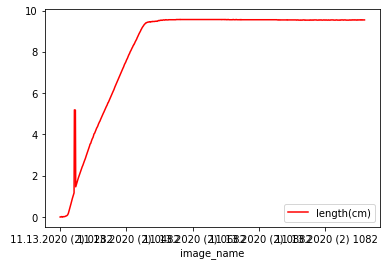

In [47]:
dataframe.plot(kind='line',x='image_name',y='length(cm)',color='red')
plt.show()